# Chasing the Bag: Factors That Influence Offered Higher Starting Salaries

## CSS 100, Team 5 Final Project

## Team members: 

Jade Vasquez, jovasque@ucsd.edu, A15932975

Juan Roa, jroa@ucsd.edu, A1554981

Vryan Feliciano, vfelicia@ucsd.edu, A15926561

Berk Aksoy, baksoy@ucsd.edu, A16257061

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

# imports for any analysis libraries:
import sklearn as sk
from sklearn import metrics
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


# imports for any classification libraries:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

# imports for visualization
from subprocess import call
from sklearn.tree import export_graphviz
from IPython.display import Image

# Getting the Data

In [ ]:
# imports data
RD = pd.read_csv("Placement_Data_Full_Class.csv")

## Quick look-over of data

In [ ]:
print(RD.info(), '\n')
print(RD.head(), '\n')
print(RD.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB
None 

   sl_no gender  ssc_p    ssc_b  ...  specialisation  mba_p 

# Data cleaning / pre-processing


In [ ]:
# check for any null values
RD.isnull().any()

sl_no             False
gender            False
ssc_p             False
ssc_b             False
hsc_p             False
hsc_b             False
hsc_s             False
degree_p          False
degree_t          False
workex            False
etest_p           False
specialisation    False
mba_p             False
status            False
salary             True
dtype: bool

In [ ]:
if len(RD[RD['salary'].isnull()]) == len(RD[RD['status']=='Not Placed']):
  print('True, length =', len(RD[RD['salary'].isnull()]))
else:
  print('False')

True, length = 67


In [ ]:
# verifies that no salary means an individual was not placed
cond1 = RD['salary'].isnull()
cond2 = RD['status'] == 'Not Placed'
RD[cond1 & cond2]

sl_no gender  ssc_p    ssc_b  ...  specialisation  mba_p      status  salary
3        4      M   56.0  Central  ...          Mkt&HR  59.43  Not Placed     NaN
5        6      M   55.0   Others  ...         Mkt&Fin  51.58  Not Placed     NaN
6        7      F   46.0   Others  ...         Mkt&Fin  53.29  Not Placed     NaN
9       10      M   58.0  Central  ...         Mkt&Fin  52.21  Not Placed     NaN
12      13      F   47.0  Central  ...          Mkt&HR  65.04  Not Placed     NaN
..     ...    ...    ...      ...  ...             ...    ...         ...     ...
198    199      F   67.0  Central  ...          Mkt&HR  71.96  Not Placed     NaN
201    202      M   54.2  Central  ...          Mkt&HR  58.44  Not Placed     NaN
206    207      M   41.0  Central  ...         Mkt&Fin  53.39  Not Placed     NaN
208    209      F   43.0  Central  ...          Mkt&HR  62.92  Not Placed     NaN
214    215      M   62.0  Central  ...          Mkt&HR  60.22  Not Placed     NaN

[67 rows x 15 columns]

In [ ]:
# removes non-placed instances and resets index
RD = RD[cond1 == False]
RD.reset_index(drop=True)

# removes unwanted features
RD.drop(['sl_no', 'ssc_b', 'hsc_b', 'status'], axis = 1, inplace=True) 

print(RD.shape)
RD.head()

(148, 11)


gender  ssc_p  hsc_p     hsc_s  ...  etest_p specialisation  mba_p    salary
0      M  67.00  91.00  Commerce  ...     55.0         Mkt&HR  58.80  270000.0
1      M  79.33  78.33   Science  ...     86.5        Mkt&Fin  66.28  200000.0
2      M  65.00  68.00      Arts  ...     75.0        Mkt&Fin  57.80  250000.0
4      M  85.80  73.60  Commerce  ...     96.8        Mkt&Fin  55.50  425000.0
7      M  82.00  64.00   Science  ...     67.0        Mkt&Fin  62.14  252000.0

[5 rows x 11 columns]

In [ ]:
# creates list of instances that are above/below 300k in salary
higher_salary = []
for i in RD['salary']:
  if i >= 300000:
    higher_salary.append(1)
  elif i < 300000:
    higher_salary.append(0)

# adds a column differentiating between instances with salaries above and below 300k
RD['Over 300k'] = higher_salary

In [ ]:
# dataset created for visualization purposes
RD_vis = RD

## removing outliers here

In [ ]:
# creates IQR
Q1 = RD['salary'].quantile(0.25)
Q3 = RD['salary'].quantile(0.75)
IQR = Q3 - Q1 

# removes outliers
filter = (RD['salary'] >= Q1 - 1.5 * IQR) & (RD['salary'] <= Q3 + 1.5 *IQR)

print(RD.shape)

RD = RD.loc[filter]

print(RD.shape)

(148, 12)
(133, 12)


Text(108.125, 0.5, 'With Outliers')

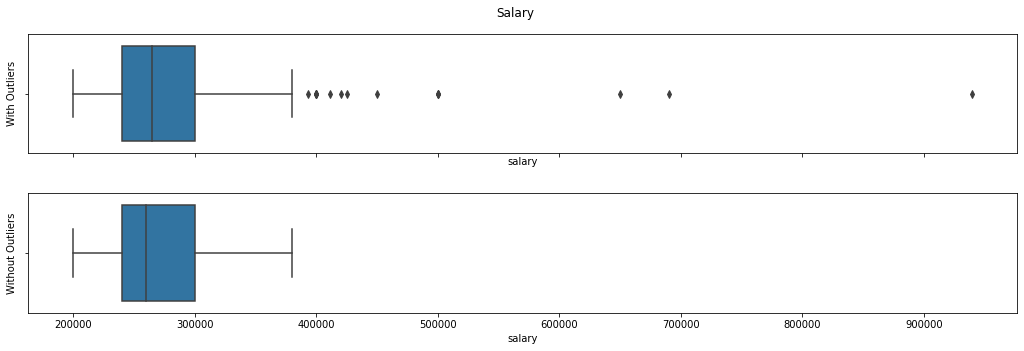

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 5), sharex=True)
fig.tight_layout(pad=3) 
fig.suptitle('Salary')

# boxplot of salaries with outliers
sns.boxplot(ax=axes[1], x=RD["salary"])
axes[1].set_ylabel('Without Outliers')

# boxplot of salaries without outliers
sns.boxplot(ax=axes[0], x=RD_vis["salary"])
axes[0].set_ylabel('With Outliers')

In [ ]:
# label encoding code
# Make copy to avoid changing original data 

object_cols=['gender','workex','specialisation']

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()

for col in object_cols:
    RD[col] = label_encoder.fit_transform(RD[col])

RD.head()

gender  ssc_p  hsc_p     hsc_s  ...  specialisation  mba_p    salary  Over 300k
0       1  67.00  91.00  Commerce  ...               1  58.80  270000.0          0
1       1  79.33  78.33   Science  ...               0  66.28  200000.0          0
2       1  65.00  68.00      Arts  ...               0  57.80  250000.0          0
7       1  82.00  64.00   Science  ...               0  62.14  252000.0          0
8       1  73.00  79.00  Commerce  ...               0  61.29  231000.0          0

[5 rows x 12 columns]

In [ ]:
# one hot encoding 
# dummy codes categorial features
dummy_hsc_s = pd.get_dummies(RD['hsc_s'], prefix='SEspec')
dummy_degree_t = pd.get_dummies(RD['degree_t'], prefix='degree')

# concatenates dummy variables to dataset
RD = pd.concat([RD, dummy_hsc_s, dummy_degree_t], axis=1)

# removes original categorical variable columns
RD.drop(['hsc_s', 'degree_t'], axis=1, inplace=True)

RD.head()

gender  ssc_p  hsc_p  ...  degree_Comm&Mgmt  degree_Others  degree_Sci&Tech
0       1  67.00  91.00  ...                 0              0                1
1       1  79.33  78.33  ...                 0              0                1
2       1  65.00  68.00  ...                 1              0                0
7       1  82.00  64.00  ...                 0              0                1
8       1  73.00  79.00  ...                 1              0                0

[5 rows x 16 columns]

# Data Visualization


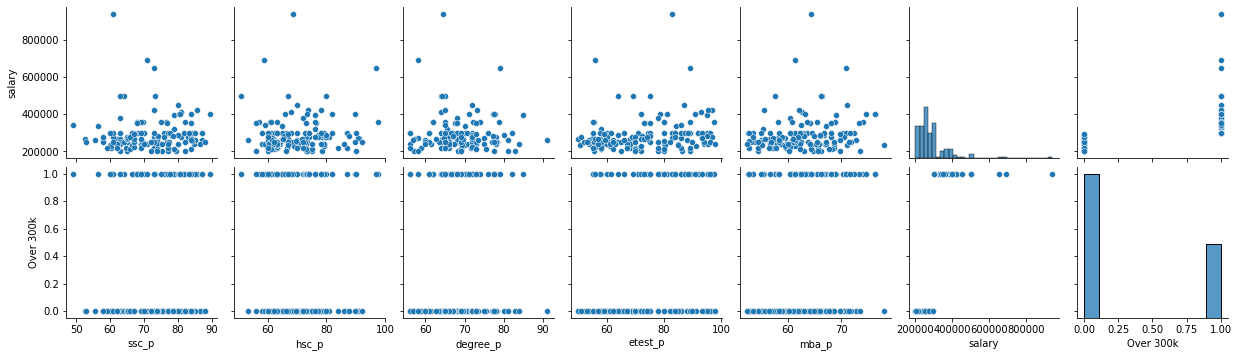

In [ ]:
sns.pairplot(data=RD_vis, y_vars=['salary', 'Over 300k'])

Text(63.125, 0.5, 'Employability Percentage')

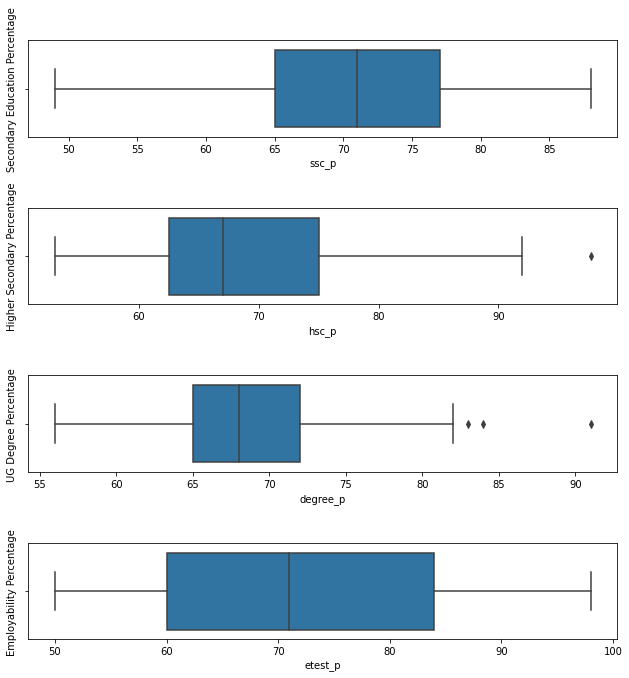

In [ ]:
# boxplot graphs for percentage data

fig, axes = plt.subplots(4, 1, figsize=(10,10))
fig.tight_layout(pad=5)


sns.boxplot(ax=axes[0], x=RD['ssc_p'])
axes[0].set_ylabel('Secondary Education Percentage')

sns.boxplot(ax=axes[1], x=RD['hsc_p'])
axes[1].set_ylabel('Higher Secondary Percentage')

sns.boxplot(ax=axes[2], x=RD['degree_p'])
axes[2].set_ylabel('UG Degree Percentage')

sns.boxplot(ax=axes[3], x=RD['etest_p'])
axes[3].set_ylabel('Employability Percentage')


[Text(0, 0, 'Mkt&HR'), Text(0, 0, 'Mkt&Fin')]

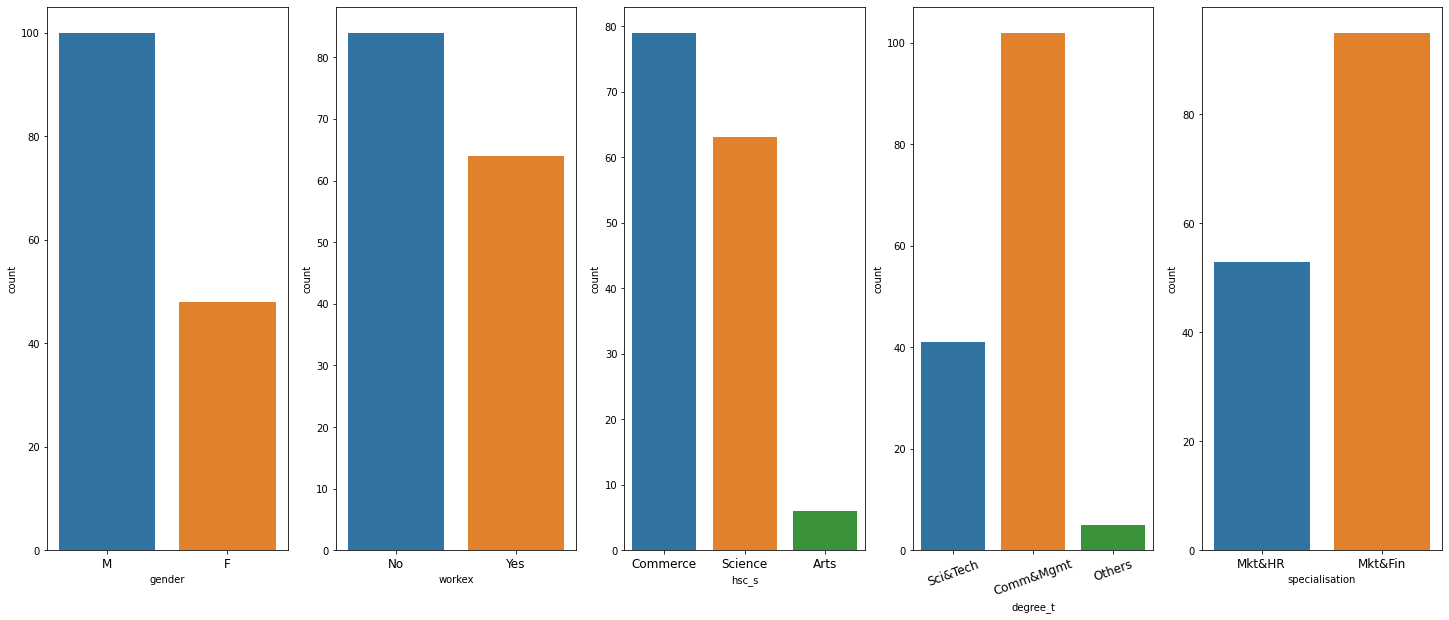

In [ ]:
# bargraphs for categorical variables
plt.figure(figsize = (25, 10))
plt.title('Categorical Variables')
fig.tight_layout(pad=4)

#Gender
plt.subplot(151)
ax=sns.countplot(x="gender", data=RD_vis)
fig = plt.gcf()
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Work experience
plt.subplot(152)
ax=sns.countplot(x="workex", data=RD_vis)
fig = plt.gcf()
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Higher secondary specialisation
plt.subplot(153)
ax=sns.countplot(x="hsc_s", data=RD_vis)
fig = plt.gcf()
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Degree type
plt.subplot(154)
ax=sns.countplot(x="degree_t", data=RD_vis)
fig = plt.gcf()
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12,rotation=20)

#Specialisaton
plt.subplot(155)
ax=sns.countplot(x="specialisation", data=RD_vis)
fig = plt.gcf()
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

Text(0.5, 1.0, 'Salary and MBA percentage')

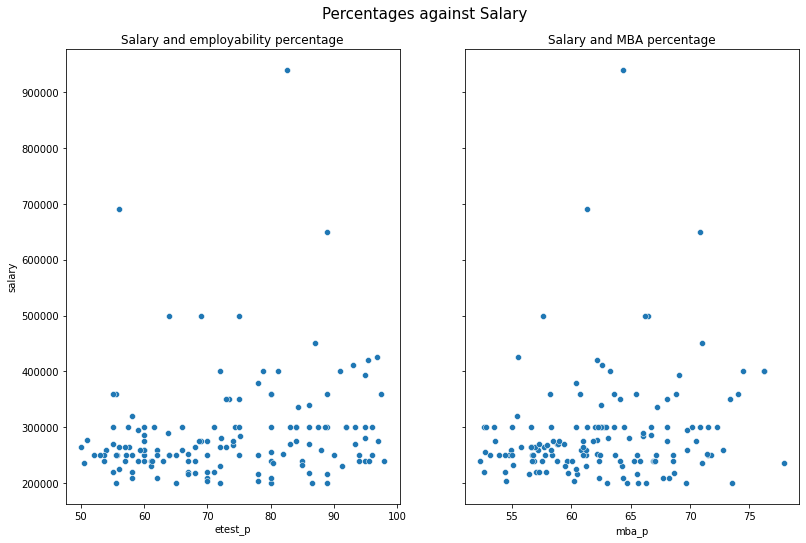

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,8), sharey=True)
fig.suptitle('Percentages against Salary', fontsize=15)
fig.tight_layout(pad=5)

# salary and employability test scatterplot

sns.scatterplot(ax=axes[0], x = RD_vis['etest_p'], y = RD_vis['salary'])
axes[0].set_title('Salary and employability percentage')

# salary and mba percentage scatterplot

sns.scatterplot(ax=axes[1], x = RD_vis['mba_p'], y = RD_vis['salary'])
axes[1].set_title('Salary and MBA percentage')


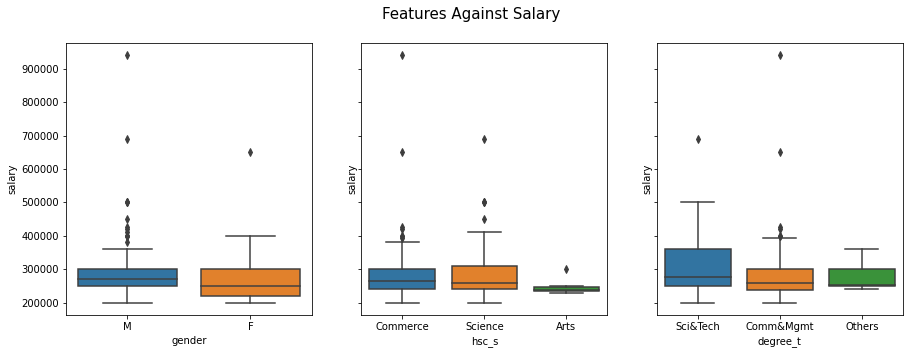

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Features Against Salary', fontsize=15)


#boxplot with salary and gender
sns.boxplot(ax=axes[0], x=RD_vis['gender'], y=RD_vis['salary'])

# Boxplot of salary by higher secondary education
sns.boxplot(ax=axes[1], x=RD_vis['hsc_s'], y=RD_vis['salary'])

# Boxplot of salary by undergrad degree type
sns.boxplot(ax=axes[2], x=RD_vis['degree_t'], y=RD_vis['salary'])

Text(0.5, 1.0, 'Distribution of salary')

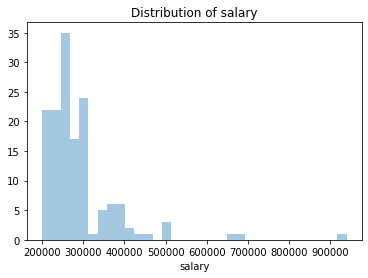

In [ ]:
# Distribution of salary

sns.distplot(RD_vis['salary'], kde = False)
plt.title('Distribution of salary')

Text(0.5, 1.0, 'Salary based on Work XP')

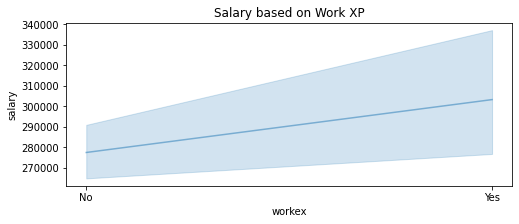

In [ ]:
#lineplot of salary by work experience and gender

plt.figure(figsize=(8,3))
sns.lineplot(data = RD_vis, y ="salary" , x ="workex",alpha=0.5)
plt.title('Salary based on Work XP')

#direct correlation in gender and work experience 


Text(0.5, 1.0, 'Salary based on Gender')

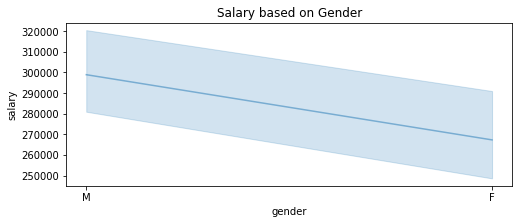

In [ ]:
plt.figure(figsize=(8,3))
sns.lineplot(data = RD_vis, y ="salary" , x ="gender",alpha=0.5)
plt.title('Salary based on Gender')


Text(0.5, 1.0, 'Gender/Degree and Salary ')

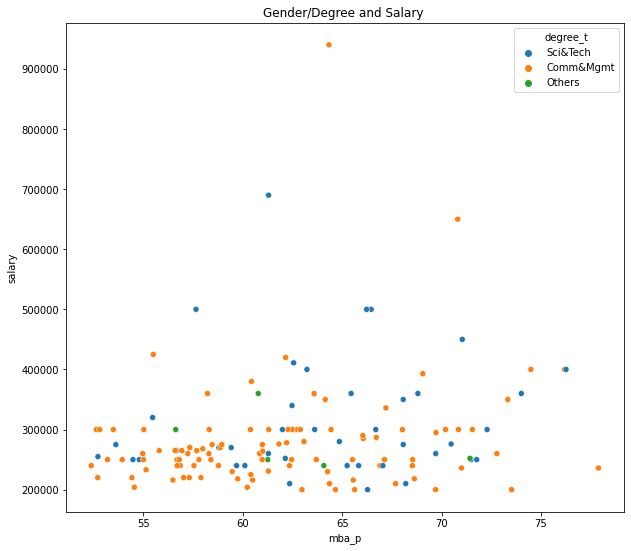

In [ ]:
# scatterplot of mba_p and degree against salary
plt.figure(figsize=(10,9))
sns.scatterplot(data = RD_vis,y ="salary" , x ="mba_p",  hue="degree_t")
plt.title('Gender/Degree and Salary ')

Text(0.5, 1.0, 'Gender/Degree and Salary ')

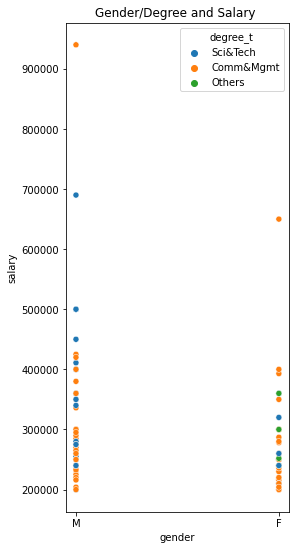

In [ ]:
# scatterplot of gender and degree against salary
plt.figure(figsize=(4,9))
sns.scatterplot(data = RD_vis,y ="salary" , x ="gender",  hue="degree_t")
plt.title('Gender/Degree and Salary ')

Text(0.5, 1.0, 'Salary based on Placement on the MBA exam')

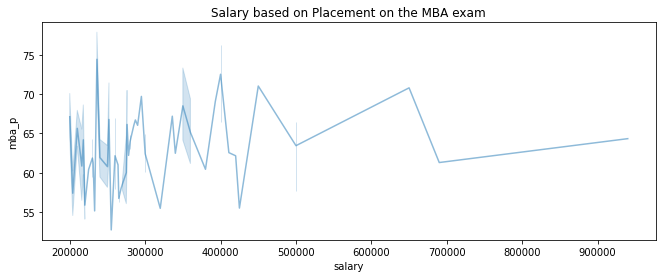

In [ ]:
#lineplot of salary by work mba score and salary

plt.figure(figsize=(11,4))
sns.lineplot(data = RD_vis, y ="mba_p" , x ="salary",alpha=0.5)
plt.title('Salary based on Placement on the MBA exam')
#presents that highest salary paid is near a 65 and even with high scores salaries are not in direct correlation

Text(0.5, 1.0, 'Salary based on Specialisation and Degree')

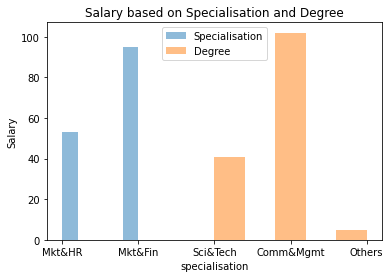

In [ ]:
# histogram salary based on specialisation and degree

a=RD_vis['specialisation']
b=RD_vis['degree_t']
plt.hist(a,bins=5,label='Specialisation',alpha=0.5)
plt.hist(b,bins=5,label='Degree',alpha=0.5)
plt.legend(loc='best') 
plt.xlabel('specialisation')
plt.ylabel('Salary')
plt.title('Salary based on Specialisation and Degree')

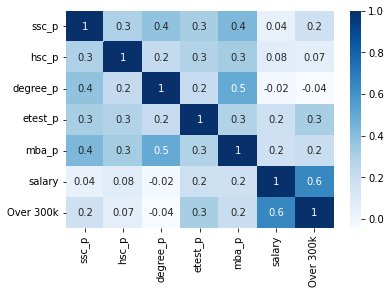

In [ ]:
# Correlation between percentages 

sns.heatmap(RD_vis.corr(),annot=True,fmt='.1g', cmap='Blues')

# Split Data into Training and Testing Subsets

In [ ]:
X = RD.drop(['salary', 'Over 300k'], axis=1) # 'salary' is a target variable that we don't want, 'Over 300k' is our classifier
y = RD['Over 300k']

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, random_state=1)

# Machine Learning Algos

In [ ]:
cont_data = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

In [ ]:
# Linear Regression Tables
def model_data(X,y):
  Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=1)

  model = LinearRegression(fit_intercept=True)
  model.fit(Xtrain,ytrain)
  
  print('Training R^2=',model.score(Xtrain,ytrain))
  print('Testing R^2=',model.score(Xtest,ytest))
  print('y = ',model.coef_[0],'*x + ',model.intercept_)
  

  y_model = model.predict(Xtest)

  # here, we create a subplots
  fig,axes = plt.subplots(Xtrain.shape[1],1,figsize=[6,8])

  if Xtrain.shape[1] == 1:
    sns.scatterplot(x = Xtest[Xtest.columns[0]],y = ytest,ax=axes)
    sns.lineplot(x = Xtest[Xtest.columns[0]],y = y_model,ax=axes)
    return


Training R^2= 0.202931266589516
Testing R^2= 0.2753267689479655
y =  0.4063250836602163 *x +  34.33406026631471


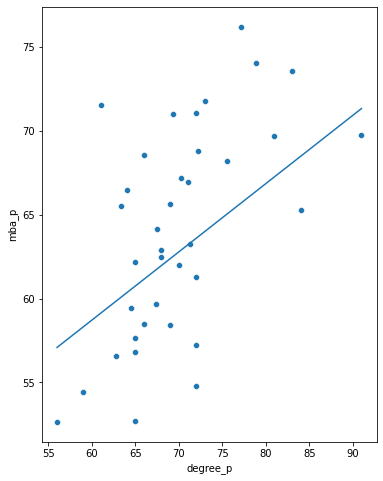

In [ ]:
model_data(RD_vis[['degree_p']],RD_vis['mba_p'])
#fitting the graph not too well since there is such vast data

Training R^2= 0.034693857782393756
Testing R^2= 0.007079256282352175
y =  3202.710064835612 *x +  88734.89826436655


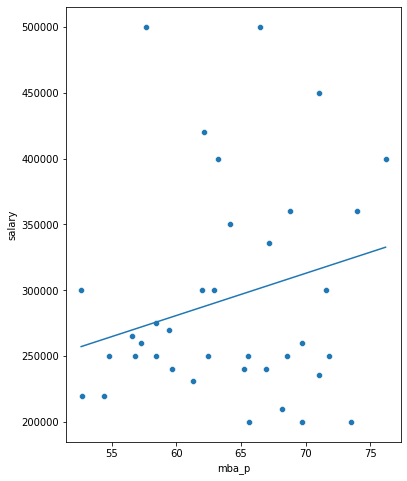

In [ ]:
model_data(RD_vis[['mba_p']],RD_vis['salary'])
#printing the R^2
#best fit line is presented below
#since both r^2 scores are low nothing is really off, any indicator of error would be if training r^2 were greater that test r^2

In [ ]:
# Logistic Regression w/ no parameters
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)
y_pred = lr.predict(Xtest)
print("Logistic Regression Accuracy:", lr.score(Xtest, ytest) )

Logistic Regression Accuracy: 0.7037037037037037


In [ ]:
# Confusion Matrix for Logistic Regression
confusion_matrix = confusion_matrix(ytest, y_pred)
print("Confusion Matrix:\n", confusion_matrix, "\n")
print("Classification Report:\n",classification_report(ytest, y_pred))

Confusion Matrix:
 [[18  3]
 [ 5  1]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82        21
           1       0.25      0.17      0.20         6

    accuracy                           0.70        27
   macro avg       0.52      0.51      0.51        27
weighted avg       0.66      0.70      0.68        27



In [ ]:
# DecisionTree Classifier, with no parameters specified:
dt = DecisionTreeClassifier()
dt = dt.fit(Xtrain,ytrain)
y_pred = dt.predict(Xtest)
print("Decision Tree Accuracy:", metrics.accuracy_score(ytest, y_pred))
print("Decision Tree Precision:", metrics.precision_score(ytest, y_pred))
print("Decision Tree Recall:", metrics.recall_score(ytest, y_pred))
print("Decision Tree F1 Score:", metrics.f1_score(ytest, y_pred))

Decision Tree Accuracy: 0.7037037037037037
Decision Tree Precision: 0.375
Decision Tree Recall: 0.5
Decision Tree F1 Score: 0.42857142857142855


In [ ]:
# create a list of features to be used in feature importance
# because inputting "RD.drop(['salary', 'Over 300k'], axis=1)" 
# for the feature importance index is not working below, for some reason
features = []
for i in X.columns:
  features.append(i)

print(features)

['gender', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'specialisation', 'mba_p', 'SEspec_Arts', 'SEspec_Commerce', 'SEspec_Science', 'degree_Comm&Mgmt', 'degree_Others', 'degree_Sci&Tech']


In [ ]:
# Use graphviz to visualize the DecisionTree:
export_graphviz(dt, out_file='tree.dot', 
                rounded = True, proportion = False, 
                feature_names = features,
                precision = 2, filled = True)

# Convert graphviz to png using system command (requires Graphviz)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
Image(filename = 'tree.png')

In [ ]:
# RandomForest Classifier, w/ default n_estimators = 100 & only accuracy score
rt=RandomForestClassifier(n_estimators=100)
rt.fit(Xtrain,ytrain)
y_pred=rt.predict(Xtest)
print("RandomForest Accuracy:", metrics.accuracy_score(ytest, y_pred))

RandomForest Accuracy: 0.6296296296296297


Text(0.5, 1.0, 'Visualizing Important Features')

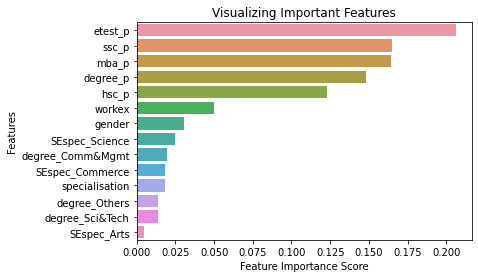

In [ ]:
# Create a feature importance barplot of the RandomForest Classifier
feature_imp = pd.Series(rt.feature_importances_,index=features).sort_values(ascending=False)

# Create feature importance barplot:
sns.barplot(x=feature_imp, y=feature_imp.index)

# Adding labels:
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")